In [1]:
# =========================================================
# HERALD COLLEGE KATHMANDU
# Assignment 1: HDI Data Analysis
# Course: 5CS037 - Concepts and Technologies of AI
# Student: ELUJA_NEPAL
# WLVID: 2548872
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


plt.style.use('default')
pd.set_option('display.max_columns', None)



In [2]:
# STEP 1: Mount Google Drive

from google.colab import drive
drive.mount('/content/drive', force_remount=False)


Mounted at /content/drive


In [3]:
# STEP 2: Define folder and file path

folder_path = "/content/drive/MyDrive/AI_Assignment_1"
file_name = "Human_Development_Index_Dataset.csv"

file_path = os.path.join(folder_path, file_name)


In [4]:
# STEP 3: Load the dataset

df = pd.read_csv(file_path, encoding="latin1")

# Display first 5 rows
display(df.head())


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,43.709,2.936460,2.117230,4.532768,0.871962,0.201659,1.493952,3115.670448,NaN,NaN,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,44.353,3.228456,2.246242,4.768261,0.915267,0.218944,1.578809,2817.304736,NaN,NaN,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,45.070,3.520452,2.383115,5.015989,0.958573,0.236229,1.663665,2474.681985,NaN,NaN,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,50.216,3.812448,2.528328,5.276587,1.001878,0.253514,1.748522,1723.019763,NaN,NaN,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,49.531,4.104445,2.682390,5.550723,1.045184,0.270800,1.833378,1202.010488,NaN,NaN,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


In [5]:
# STEP 4: Inspect exact column names to avoid errors

print(df.columns.tolist())


['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy', 'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m', 'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m', 'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m', 'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m', 'gender_development', 'gender_inequality', 'secondary_education_f_%', 'secondary_education_m_%', 'seats_in_parliament_f_%', 'seats_in_parliament_m_%', 'labour_participation_f_%', 'labour_participation_m_%', 'co2_emission_tons', 'mat_footprint_percap_tons']


In [6]:
# STEP 4: Clean and standardize column names to avoid errors

df.columns = df.columns.str.strip().str.lower()

df.rename(columns={
    'human development index (hdi)': 'hdi'
}, inplace=True)

print(df.columns.tolist())


['unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy', 'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m', 'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m', 'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m', 'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m', 'gender_development', 'gender_inequality', 'secondary_education_f_%', 'secondary_education_m_%', 'seats_in_parliament_f_%', 'seats_in_parliament_m_%', 'labour_participation_f_%', 'labour_participation_m_%', 'co2_emission_tons', 'mat_footprint_percap_tons']


Problem 1A – Single Year HDI Exploration (2022)

In [7]:
# Problem 1A - Task 1
# Identify unique years in the dataset

sorted(df['year'].unique())


[np.int64(1990),
 np.int64(1991),
 np.int64(1992),
 np.int64(1993),
 np.int64(1994),
 np.int64(1995),
 np.int64(1996),
 np.int64(1997),
 np.int64(1998),
 np.int64(1999),
 np.int64(2000),
 np.int64(2001),
 np.int64(2002),
 np.int64(2003),
 np.int64(2004),
 np.int64(2005),
 np.int64(2006),
 np.int64(2007),
 np.int64(2008),
 np.int64(2009),
 np.int64(2010),
 np.int64(2011),
 np.int64(2012),
 np.int64(2013),
 np.int64(2014),
 np.int64(2015),
 np.int64(2016),
 np.int64(2017),
 np.int64(2018),
 np.int64(2019),
 np.int64(2020),
 np.int64(2021),
 np.int64(2022)]

In [8]:
# Problem 1A - Task 1
# Filter dataset for year 2022

hdi_2022_df = df[df['year'] == 2022].copy()
display(hdi_2022_df.head())


,unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,14.487470,14.681040,14.292200,10.121144,9.811468,10.433855,15293.326510,13198.539560,17398.003690,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,15.487880,16.264179,14.743880,6.987444,6.490568,7.481537,10978.405710,3841.656612,17858.790780,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,81.430,12.783780,12.765060,12.810630,11.613440,11.522590,11.704380,54233.449480,NaN,NaN,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,59.351,12.167600,11.535400,12.909900,5.844292,4.462809,7.187960,5327.788251,4696.356687,5973.845631,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568


In [9]:
# Problem 1A - Task 2
# Display first 10 rows

hdi_2022_df.head(10)


,unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,14.487470,14.681040,14.292200,10.121144,9.811468,10.433855,15293.326510,13198.539560,17398.003690,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,15.487880,16.264179,14.743880,6.987444,6.490568,7.481537,10978.405710,3841.656612,17858.790780,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,81.430,12.783780,12.765060,12.810630,11.613440,11.522590,11.704380,54233.449480,NaN,NaN,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,59.351,12.167600,11.535400,12.909900,5.844292,4.462809,7.187960,5327.788251,4696.356687,5973.845631,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,76.507,15.512328,16.746290,14.350537,10.546230,10.344223,10.595975,18783.965360,NaN,NaN,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,72.851,18.979509,20.914900,17.130329,11.144080,11.391660,10.857980,22047.971310,16933.062910,27264.830910,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,67.866,14.405610,14.812910,14.022340,11.330300,11.321520,11.341190,15388.299760,13442.501330,17770.415300,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,81.708,21.080021,21.981430,20.193760,12.726820,12.810590,12.639710,49257.135200,41131.470850,57495.771580,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,80.150,16.367460,16.838499,15.922670,12.305714,12.048949,12.578872,56529.663290,41899.211240,71616.204300,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


In [10]:
# Problem 1A - Task 2
# Number of rows and columns

hdi_2022_df.shape


(206, 30)

In [11]:
# Problem 1A - Task 2
# Column names and data types

hdi_2022_df.dtypes


,0
unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


In [12]:
# Problem 1A - Task 3
# Check missing values

hdi_2022_df.isnull().sum()


,0
unnamed: 0,0
iso3,0
country,0
year,0
hdi,2
life_expectancy,0
pop_millions,0
hdi_f,13
hdi_m,13
life_expec_f,0


In [13]:
# Problem 1A - Task 3
# Data cleaning:
# - Replace special characters
# - Convert numeric columns
# - Remove duplicates
# - Drop rows with missing HDI

hdi_2022_df.replace("–", np.nan, inplace=True)

numeric_cols = ['hdi', 'life expectancy', 'gross inc percap', 'gender development']

for col in numeric_cols:
    if col in hdi_2022_df.columns:
        hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')

hdi_2022_df.drop_duplicates(inplace=True)
hdi_2022_df.dropna(subset=['hdi'], inplace=True)

hdi_2022_df.isnull().sum()


,0
unnamed: 0,0
iso3,0
country,0
year,0
hdi,0
life_expectancy,0
pop_millions,0
hdi_f,11
hdi_m,11
life_expec_f,0


In [14]:
# Problem 1A - Task 4
# Mean, median, standard deviation of HDI

hdi_2022_df['hdi'].mean(), hdi_2022_df['hdi'].median(), hdi_2022_df['hdi'].std()


(np.float64(0.7228872549019609), 0.7395, 0.15302880386427825)

In [15]:
# Problem 1A - Task 4
# Highest and lowest HDI country

hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()][['country','hdi']], \
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()][['country','hdi']]


(country    Switzerland
 hdi              0.967
 Name: 5609, dtype: object,
 country    Somalia
 hdi           0.38
 Name: 5345, dtype: object)

In [16]:
# Problem 1A - Task 5
# Filter countries with HDI greater than 0.800
# Sort by Gross National Income per Capita in descending order
# Display top 10 countries

high_hdi = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]

high_hdi_sorted = high_hdi.sort_values(
    by='gross_inc_percap',
    ascending=False
)

high_hdi_sorted.head(10)


,unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
3332,3333,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,83.019,15.466400,14.518240,16.434999,12.351169,12.090864,14.049712,146673.24150,114828.83430,179045.06860,0.949,NaN,NaN,NaN,28.000000,72.000000,52.79,67.26,3.736776,NaN
4718,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,80.626,13.264270,15.289560,12.649090,10.131722,11.796383,9.737610,95944.37754,47963.67663,114134.84230,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
5213,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,81.981,16.902731,17.034019,16.810640,11.924880,11.627060,12.254710,88761.14559,76610.86780,99844.23650,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
2705,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,81.017,19.126101,19.475800,18.771580,11.656957,11.863226,11.437631,87467.51391,66876.42142,108423.61080,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
3398,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,80.445,14.197050,14.315570,14.088360,12.960081,12.934179,12.962670,78554.23640,66697.04897,90255.76002,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
6104,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,77.720,17.208139,19.753281,16.379900,12.773750,12.588370,12.905890,74103.71494,51509.56703,84087.84953,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
5609,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,82.484,16.583731,16.677860,16.498199,13.904066,13.549473,14.268536,69432.78669,56927.80503,82109.48430,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
4322,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,81.718,18.638460,19.521360,17.803841,13.062343,13.210113,12.912692,69189.76165,61067.47743,77164.33022,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
6170,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,75.479,16.412741,17.262751,15.585690,13.575500,13.653570,13.493290,65564.93798,53469.38514,77898.33045,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
2474,2475,HKG,"Hong Kong, China (SAR)",2022,0.956,84.315,7.488865,0.942671,0.969515,86.893,81.754,17.849590,17.872049,17.841379,12.347770,11.995980,12.788720,62485.50516,51562.96012,75269.83474,0.972,NaN,77.866913,84.067802,NaN,NaN,52.91,64.71,4.373242,NaN


In [17]:
# Problem 1A - Task 6
# Add HDI Category column

def hdi_category(h):
    if h < 0.550:
        return "Low"
    elif h <= 0.699:
        return "Medium"
    elif h <= 0.799:
        return "High"
    else:
        return "Very High"

hdi_2022_df['hdi category'] = hdi_2022_df['hdi'].apply(hdi_category)
hdi_2022_df[['country','hdi','hdi category']].head()


,country,hdi,hdi category
32,Afghanistan,0.462,Low
65,Albania,0.789,High
98,Algeria,0.745,High
131,Andorra,0.884,Very High
164,Angola,0.591,Medium


In [18]:
# Save final CSV for Problem 1A

hdi_2022_df.to_csv("HDI_category_added.csv", index=False)


PROBLEM 1B – HDI TREND ANALYSIS (2020–2022)

In [19]:
# Problem 1B - Task 1
# Filter dataset for years 2020, 2021, 2022

hdi_1b_df = df[df['year'].isin([2020, 2021, 2022])].copy()


In [20]:
# Save dataset for Problem 1B

hdi_1b_df.to_csv("HDI_problem1B.csv", index=False)


In [21]:
# Problem 1B - Task 2
# Cleaning dataset

hdi_1b_df.replace("–", np.nan, inplace=True)

for col in numeric_cols:
    if col in hdi_1b_df.columns:
        hdi_1b_df[col] = pd.to_numeric(hdi_1b_df[col], errors='coerce')

hdi_1b_df.drop_duplicates(inplace=True)
hdi_1b_df.dropna(subset=['hdi','country','year'], inplace=True)


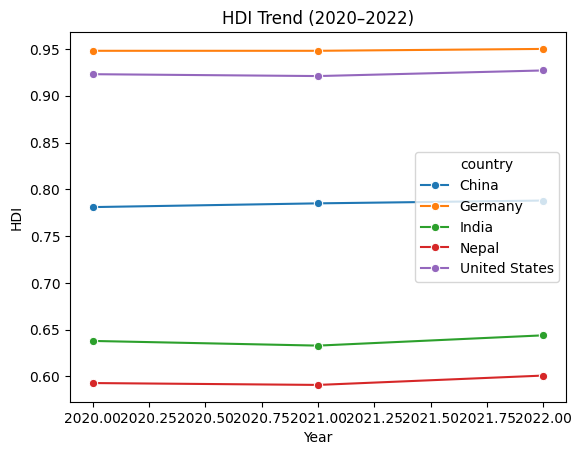

In [22]:
# Problem 1B - Task 3A
# HDI trend line plot

countries = ['Nepal','India','China','United States','Germany']
plot_df = hdi_1b_df[hdi_1b_df['country'].isin(countries)]

sns.lineplot(data=plot_df, x='year', y='hdi', hue='country', marker='o')
plt.title("HDI Trend (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.show()


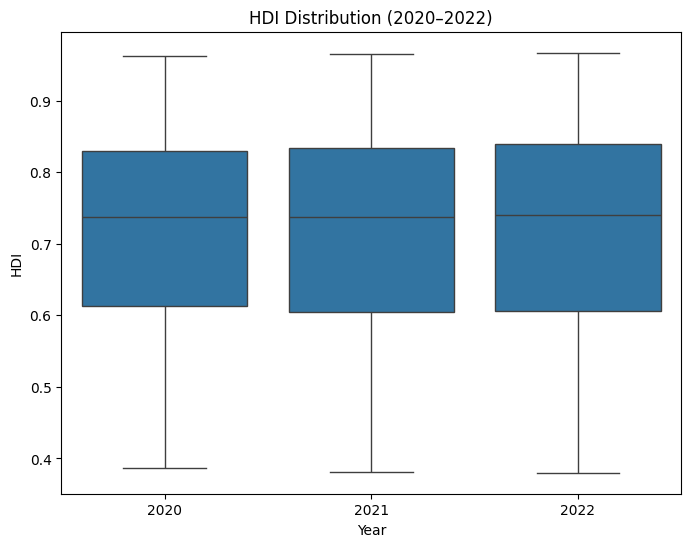

In [23]:
# Box Plot: HDI distribution for 2020, 2021, and 2022

box_plot_data = hdi_1b_df[hdi_1b_df['year'].isin([2020, 2021, 2022])]

plt.figure(figsize=(8,6))
sns.boxplot(data=box_plot_data, x='year', y='hdi')
plt.title("HDI Distribution (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.show()


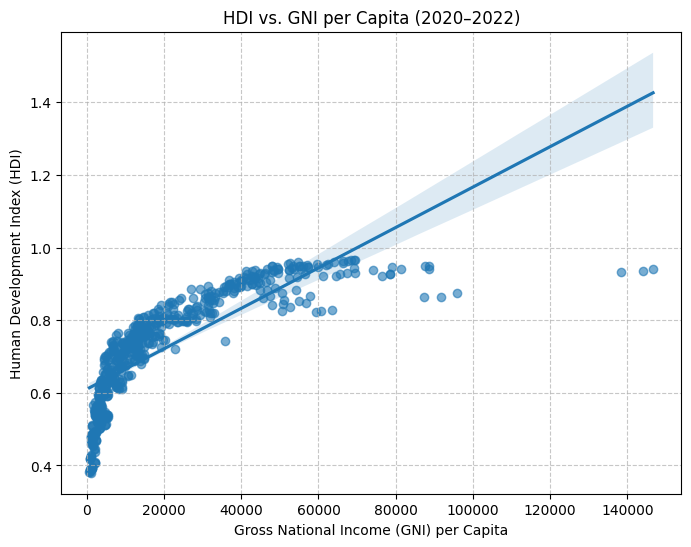

In [24]:
hdi_1b_df.columns = hdi_1b_df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 1: Check if required columns exist
if 'gross_inc_percap' in hdi_1b_df.columns and 'hdi' in hdi_1b_df.columns:
    plt.figure(figsize=(8,6))

    sns.regplot(
        data=hdi_1b_df,
        x='gross_inc_percap',
        y='hdi',
        scatter_kws={'alpha': 0.6}
    )

    plt.title('HDI vs. GNI per Capita (2020–2022)')
    plt.xlabel('Gross National Income (GNI) per Capita')
    plt.ylabel('Human Development Index (HDI)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Required columns 'gross_inc_percap' and/or 'hdi' are not available in the dataset.")

PROBLEM 2 – ADVANCED HDI EXPLORATION

In [25]:
# Problem 2 - Task 1
# Create South Asia subset

south_asia = ["Afghanistan","Bangladesh","Bhutan","India","Maldives","Nepal","Pakistan","Sri Lanka"]
south_df = df[df['country'].isin(south_asia)].copy()

south_df.to_csv("HDI_SouthAsia.csv", index=False)


In [26]:
# Problem 2 - Task 2
# Create Composite Development Score
# Composite Score = 0.30 × Life Expectancy Index + 0.30 × GNI per Capita Index

south_df['composite_score'] = (
    0.30 * south_df['life_expectancy'] +
    0.30 * south_df['gross_inc_percap']
)

# Rank South Asian countries by Composite Score
south_df_sorted = south_df.sort_values(by='composite_score', ascending=False)

south_df_sorted[['country', 'composite_score']].head()


,country,composite_score
3530,Maldives,5678.289357
3527,Maldives,5628.012408
3526,Maldives,5440.721295
3525,Maldives,5266.375503
3524,Maldives,5097.397866


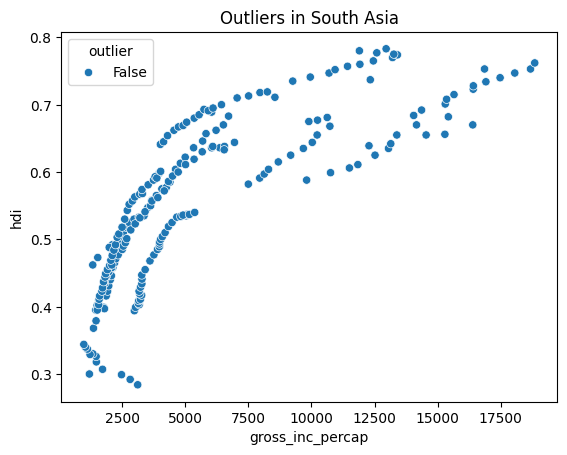

In [27]:
# Problem 2 - Task 3
# Outlier detection using IQR

Q1 = south_df['hdi'].quantile(0.25)
Q3 = south_df['hdi'].quantile(0.75)
IQR = Q3 - Q1

south_df['outlier'] = (south_df['hdi'] < Q1 - 1.5*IQR) | (south_df['hdi'] > Q3 + 1.5*IQR)
sns.scatterplot(data=south_df, x='gross_inc_percap', y='hdi', hue='outlier')
plt.title("Outliers in South Asia")
plt.show()



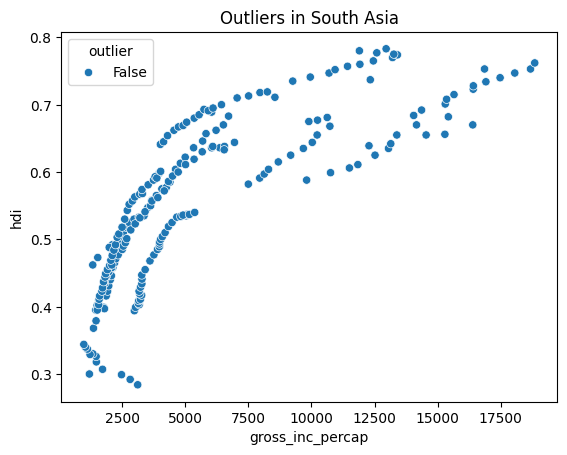

In [28]:
# Scatter plot highlighting outliers

sns.scatterplot(data=south_df, x='gross_inc_percap', y='hdi', hue='outlier')
plt.title("Outliers in South Asia")
plt.show()


PROBLEM 3 – SOUTH ASIA VS MIDDLE EAST


In [29]:
# Problem 3 - Task 1
# Middle East subset

middle_east = ["Bahrain","Iran","Iraq","Israel","Jordan","Kuwait","Lebanon",
               "Oman","Palestine","Qatar","Saudi Arabia","Syria",
               "United Arab Emirates","Yemen"]

me_df = hdi_1b_df[hdi_1b_df['country'].isin(middle_east)].copy()
sa_df = hdi_1b_df[hdi_1b_df['country'].isin(south_asia)].copy()

me_df.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)
sa_df.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)


In [30]:
# Problem 3 - Task 2
# Mean and standard deviation of HDI

sa_df['hdi'].mean(), sa_df['hdi'].std(), me_df['hdi'].mean(), me_df['hdi'].std()


(np.float64(0.6395833333333333),
 0.09827331747496995,
 np.float64(0.7889090909090909),
 0.14129476362297624)

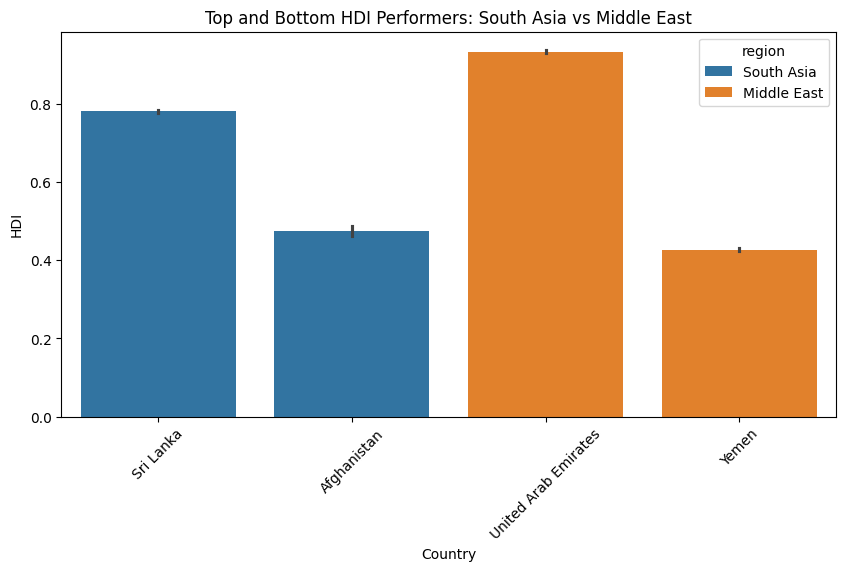

In [31]:
# Problem 3 - Task 3
# Identify top 3 and bottom 3 countries in each region

sa_top3 = sa_df.sort_values(by='hdi', ascending=False).head(3)
sa_bottom3 = sa_df.sort_values(by='hdi', ascending=True).head(3)

me_top3 = me_df.sort_values(by='hdi', ascending=False).head(3)
me_bottom3 = me_df.sort_values(by='hdi', ascending=True).head(3)

sa_top3[['country','hdi']], sa_bottom3[['country','hdi']], \
me_top3[['country','hdi']], me_bottom3[['country','hdi']]


comparison_df = pd.concat([
    sa_top3.assign(region='South Asia'),
    sa_bottom3.assign(region='South Asia'),
    me_top3.assign(region='Middle East'),
    me_bottom3.assign(region='Middle East')
])

plt.figure(figsize=(10,5))
sns.barplot(data=comparison_df, x='country', y='hdi', hue='region')
plt.title("Top and Bottom HDI Performers: South Asia vs Middle East")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("HDI")
plt.show()



/tmp/ipython-input-2096112321.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=metric_df, x='region', y='gender_development', ci=None)


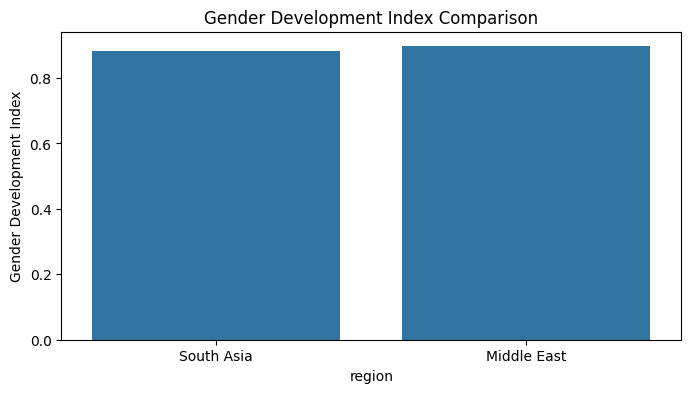

In [32]:
# Problem 3 - Task 4
# Compare Gender Development Index across regions

metric_df = pd.concat([
    sa_df.assign(region='South Asia'),
    me_df.assign(region='Middle East')
])

plt.figure(figsize=(8,4))
sns.barplot(data=metric_df, x='region', y='gender_development', ci=None)
plt.title("Gender Development Index Comparison")
plt.ylabel("Gender Development Index")
plt.show()


/tmp/ipython-input-118966943.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=metric_df, x='region', y='gross_inc_percap', ci=None)


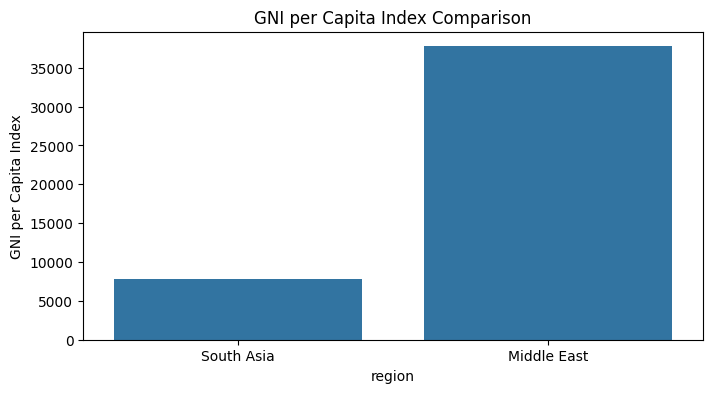

In [33]:
# Problem 3 - Task 4
# Compare GNI per Capita Index across regions

plt.figure(figsize=(8,4))
sns.barplot(data=metric_df, x='region', y='gross_inc_percap', ci=None)
plt.title("GNI per Capita Index Comparison")
plt.ylabel("GNI per Capita Index")
plt.show()


In [34]:
# Problem 3 - Task 5
# Compute HDI range and coefficient of variation

sa_range = sa_df['hdi'].max() - sa_df['hdi'].min()
me_range = me_df['hdi'].max() - me_df['hdi'].min()

sa_cv = sa_df['hdi'].std() / sa_df['hdi'].mean()
me_cv = me_df['hdi'].std() / me_df['hdi'].mean()

sa_range, sa_cv, me_range, me_cv
if sa_cv > me_cv:
    "South Asia has higher HDI variation"
else:
    "Middle East has higher HDI variation"



In [35]:
# Problem 3 - Task 5
# Identify which region has more HDI variation

if sa_cv > me_cv:
    "South Asia has higher HDI variation"
else:
    "Middle East has higher HDI variation"


In [36]:
# Problem 3 - Task 6
# Correlation analysis

sa_corr = sa_df[['hdi','gender_development','life_expectancy']].corr()
me_corr = me_df[['hdi','gender_development','life_expectancy']].corr()

sa_corr, me_corr


(                         hdi  gender_development  life_expectancy
 hdi                 1.000000            0.874218         0.938764
 gender_development  0.874218            1.000000         0.853780
 life_expectancy     0.938764            0.853780         1.000000,
                          hdi  gender_development  life_expectancy
 hdi                 1.000000            0.935670         0.933123
 gender_development  0.935670            1.000000         0.912836
 life_expectancy     0.933123            0.912836         1.000000)

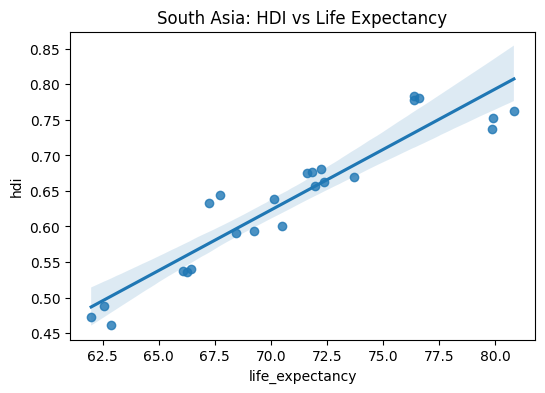

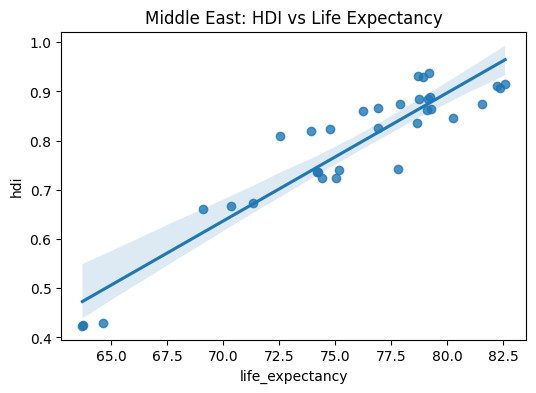

In [37]:
# Problem 3 - Task 6
# Scatter plots with regression lines

plt.figure(figsize=(6,4))
sns.regplot(data=sa_df, x='life_expectancy', y='hdi')
plt.title("South Asia: HDI vs Life Expectancy")
plt.show()

plt.figure(figsize=(6,4))
sns.regplot(data=me_df, x='life_expectancy', y='hdi')
plt.title("Middle East: HDI vs Life Expectancy")
plt.show()



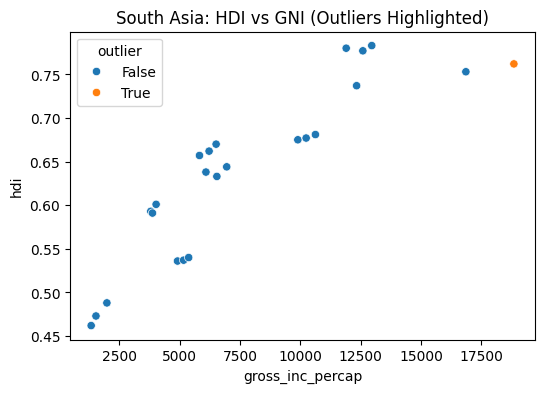

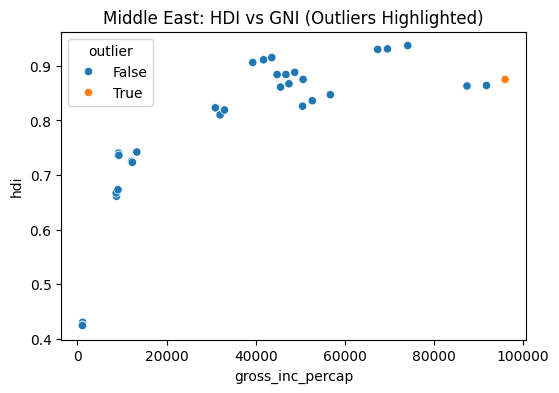

In [38]:

# Step 1: Detect outliers
# We create a new column 'outlier' in each DataFrame.
# Here, we define outliers as points where 'gross_inc_percap' is
# more than 2 standard deviations away from the mean.
# This is necessary because Seaborn cannot use 'hue' if the column doesn't exist.
# -----------------------------
sa_df['outlier'] = np.abs(sa_df['gross_inc_percap'] - sa_df['gross_inc_percap'].mean()) > 2 * sa_df['gross_inc_percap'].std()
me_df['outlier'] = np.abs(me_df['gross_inc_percap'] - me_df['gross_inc_percap'].mean()) > 2 * me_df['gross_inc_percap'].std()

# Step 2: Plot South Asia data
plt.figure(figsize=(6,4))
sns.scatterplot(data=sa_df, x='gross_inc_percap', y='hdi', hue='outlier')
plt.title("South Asia: HDI vs GNI (Outliers Highlighted)")
plt.show()

# Step 3: Plot Middle East data
# Same logic as above.
plt.figure(figsize=(6,4))
sns.scatterplot(data=me_df, x='gross_inc_percap', y='hdi', hue='outlier')
plt.title("Middle East: HDI vs GNI (Outliers Highlighted)")
plt.show()
